# Exploring the Data

In [175]:
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib as mpl

# Pretty display for notebooks
%matplotlib inline



In [176]:
data = pd.read_csv("transactional-sample.csv")

## 3. Preprocess Data:

Handle missing values (e.g., impute or remove).

Encode categorical features (e.g., card_number, has_cbk).

Convert datetime objects to numerical features (e.g., extract hour, day of week).

Consider feature scaling for numerical features.

In [177]:
data.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [178]:
data.fillna(value=-1, inplace=True)

data["has_cbk"] = data["has_cbk"].astype(float) 
data.dtypes 

transaction_id          int64
merchant_id             int64
user_id                 int64
card_number            object
transaction_date       object
transaction_amount    float64
device_id             float64
has_cbk               float64
dtype: object

In [179]:
from sklearn.preprocessing import OrdinalEncoder

def extract_numerical_parts(string_value):
    first_digits = string_value[:6]
    last_digits = string_value[-4:]
    return first_digits + last_digits

data["transaction_date_code"] = pd.to_numeric(pd.to_datetime(data["transaction_date"])) 
data["card_number_code"] = data["card_number"].apply(extract_numerical_parts)
cleaned_df = data.copy()
data = data.drop(columns=['card_number', 'transaction_date', 'transaction_id'])

data.head(10)

,merchant_id,user_id,transaction_amount,device_id,has_cbk,transaction_date_code,card_number_code
0,29744,97051,374.56,285475.0,0.0,1575242192812632000,4345059116
1,92895,2708,734.87,497105.0,1.0,1575240337873639000,4444564210
2,47759,14777,760.36,-1.0,0.0,1575238963021495000,4258507024
3,68657,69758,2556.13,-1.0,1.0,1575237559797129000,4642963991
4,54075,64367,55.36,860232.0,0.0,1575235853347051000,6504876116
5,59566,40759,60.49,192705.0,0.0,1575235553374213000,5162928220
6,20917,25661,318.37,760932.0,0.0,1575235519532243000,6504859310
7,56107,81152,188.68,486.0,1.0,1575235445608374000,6505169201
8,56107,81152,352.77,486.0,1.0,1575234801529999000,6505169201
9,56107,81152,345.68,486.0,1.0,1575234295066909000,6505169201


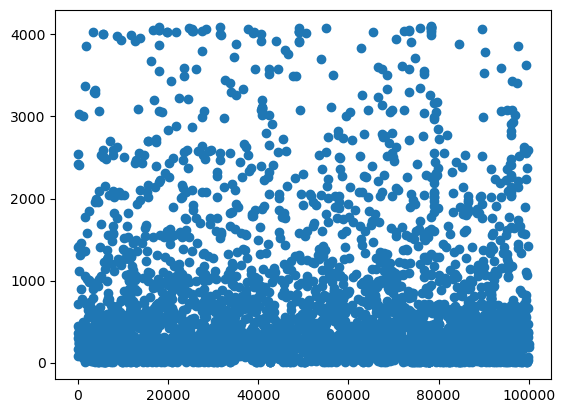

In [180]:
 
import pandas as pd
import matplotlib.pyplot as plt
 
x = data.user_id
y = data.transaction_amount
plt.scatter(x, y)
plt.show()   


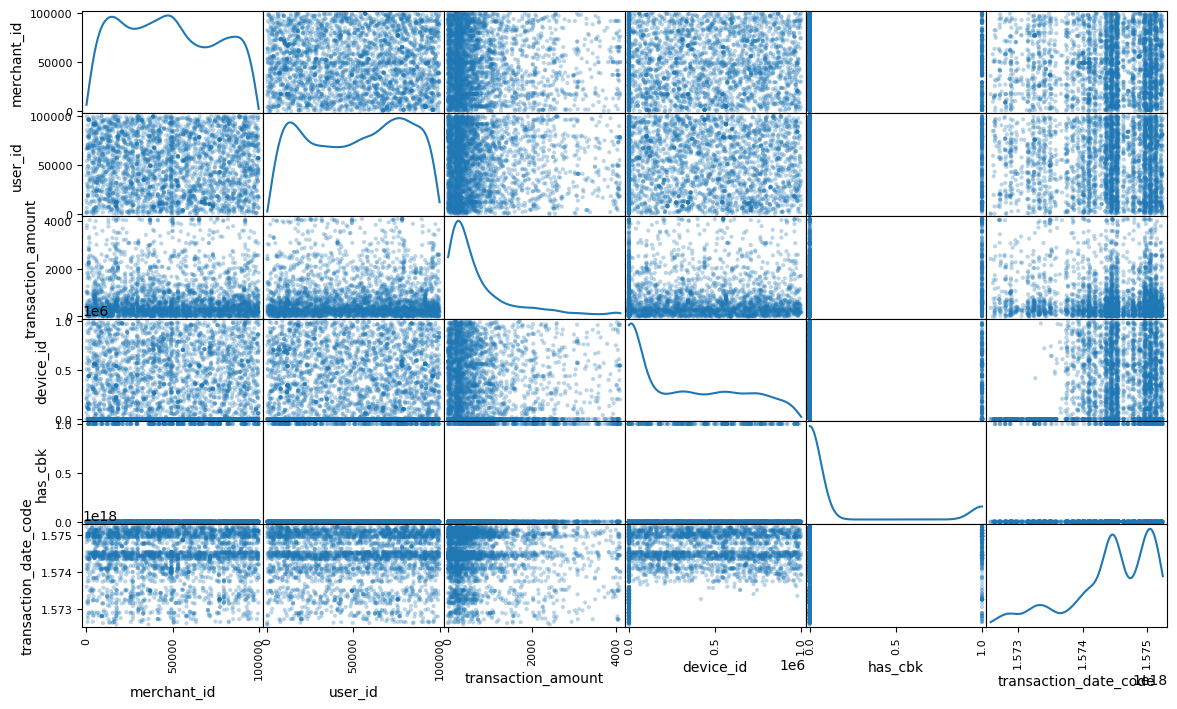

In [181]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [182]:
import seaborn as sns
# visualize percentiles with heatmap (with default confs)
#sns.heatmap(data.corr())

In [183]:
# 3. Split the data into features (X) and target variable (y)
# X = data.drop("has_cbk", axis=1)
# y = data["has_cbk"]

# # 4. Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 5. Train a model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 6. Make predictions on the testing set
# y_pred = model.predict(X_test)

# # 7. Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [184]:
# # Check the dataset shape
# print(data.shape)
# print("------------------------------")
# # Check summary statistics
# print(data.describe())
# print("------------------------------")
# # Check class distribution
# print(data['has_cbk'].value_counts())

In [185]:
# from sklearn.model_selection import train_test_split

In [186]:
# X = data.drop('has_cbk', axis=1)  # Features
# y = data['has_cbk']  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
# # Create a Logistic Regression model
# model = LogisticRegression()
# # Fit the model to the training data
# model.fit(X_train, y_train)

In [189]:
# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted 0", "Predicted 1"],
#             yticklabels=["Actual 0", "Actual 1"])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()